In [1]:
import numpy as np
from matplotlib import pyplot as plt
%load_ext autoreload
%autoreload 2
import dice_battle_seq as dice_seq
import dice_battle_sim as dice_sim
import print_dice 
from scipy.signal import savgol_filter
np.set_printoptions(suppress=True)

In [79]:
print_dice.print_dice_rolls([1,2,6,5])





+-----+  +-----+  +-----+  +-----+  
|     |  | o   |  | o o |  | o o |  
|  o  |  |     |  | o o |  |  o  |  
|     |  |   o |  | o o |  | o o |  
+-----+  +-----+  +-----+  +-----+  


In [223]:
from scipy.optimize import linprog
A = [[0,-2,1,1],[2,0,-2,1],[-1,2,0,-2],[-1,-1,2,0]]
c = [0,0,0,0]
b = [0,0,0,0]
A_eq = [[1,1,1,1]]
b_eq = [1]


In [224]:
res = linprog(c, A_ub=A, b_ub=b,A_eq = A_eq, b_eq=b_eq)

In [225]:
res.x

array([0. , 0.4, 0.2, 0.4])

In [27]:
N = np.arange(0,500,2)+10
D = 10
P = dice_seq.probabilities(D)
N1b, r1b = dice_seq.expected_rewards(dice_seq.optimal_strategy,dice_seq.blind_strategy,500,N,D,P)
N1b, r2b = dice_seq.expected_rewards(dice_seq.optimal_strategy,dice_seq.random_strategy,500,N,D,P)
N1b, r3b = dice_seq.expected_rewards(dice_seq.optimal_strategy,dice_seq.optimal_strategy,500,N,D,P)

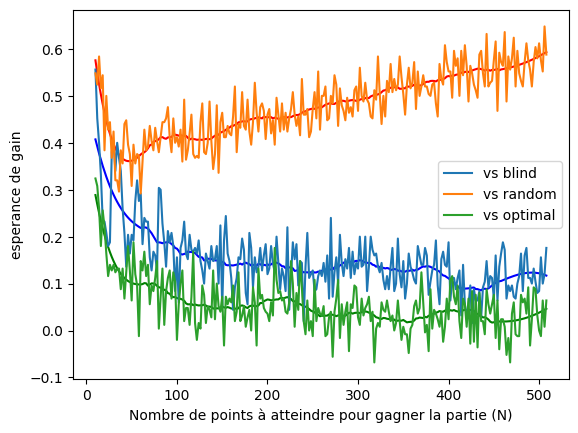

In [28]:

plt.rcdefaults()
fig, ax = plt.subplots()
y1 = savgol_filter(r1b,51,3)
y2 = savgol_filter(r2b,51,3)
y3 = savgol_filter(r3b,51,3)
ax.plot(N1b, y1, 'b')
ax.plot(N1b,y2, 'r-')
ax.plot(N1b,y3, 'g')
ax.plot(N1b, r1b, label='vs blind')
ax.plot(N1b,r2b, label='vs random')
ax.plot(N1b,r3b, label='vs optimal')
ax.set_xlabel("Nombre de points à atteindre pour gagner la partie (N)")
ax.set_ylabel('esperance de gain')
"""ax.set_title("Esperance de gain du joueur optimal lorsqu'il entame la partie et avec D=10")"""
plt.legend()
fig.savefig('optVSall_first_N.png')

In [43]:
N = np.arange(0,500,2)+10
D = 10
P = dice_seq.probabilities(D)
N1b, r1c = dice_seq.expected_rewards(dice_seq.blind_strategy,dice_seq.optimal_strategy,500,N,D,P,reverse=True)
N1b, r2c = dice_seq.expected_rewards(dice_seq.random_strategy,dice_seq.optimal_strategy,500,N,D,P,reverse=True)
N1b, r3c = dice_seq.expected_rewards(dice_seq.optimal_strategy,dice_seq.optimal_strategy,500,N,D,P,reverse=True)

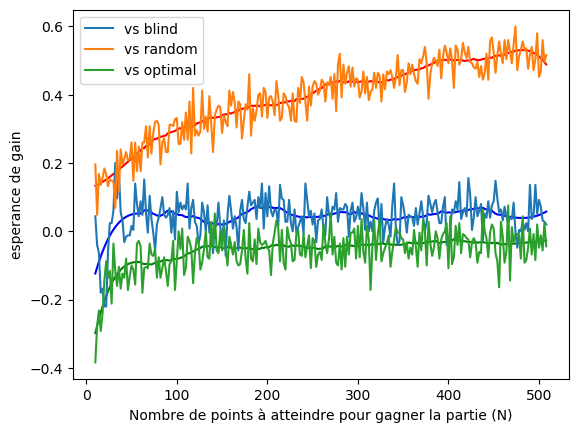

In [44]:

plt.rcdefaults()
fig, ax = plt.subplots()
x1 = savgol_filter(r1c,51,3)
x2 = savgol_filter(r2c,51,3)
x3 = savgol_filter(r3c,51,3)
ax.plot(N1b, x1, 'b')
ax.plot(N1b,x2, 'r-')
ax.plot(N1b,x3, 'g')
ax.plot(N1b, r1c, label='vs blind')
ax.plot(N1b,r2c, label='vs random')
ax.plot(N1b,r3c, label='vs optimal')
ax.set_xlabel("Nombre de points à atteindre pour gagner la partie (N)")
ax.set_ylabel('esperance de gain')
"""ax.set_title("Esperance de gain du joueur optimal lorsqu'il joue en deuxième et avec D=10")"""
plt.legend()
fig.savefig('optVSall_scnd_N.png')

In [46]:
N = np.arange(0,500,2)+10
D = 10
P = dice_seq.probabilities(D)
N1b, s1b = dice_seq.expected_rewards(dice_seq.blind_strategy,dice_seq.blind_strategy,500,N,D,P)
N1b, s2b = dice_seq.expected_rewards(dice_seq.blind_strategy,dice_seq.random_strategy,500,N,D,P)
N1b, s3b = dice_seq.expected_rewards(dice_seq.blind_strategy,dice_seq.optimal_strategy,500,N,D,P)

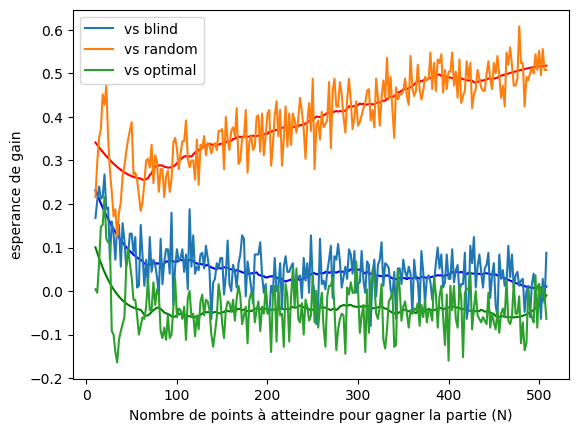

In [47]:

plt.rcdefaults()
fig, ax = plt.subplots()
w1 = savgol_filter(s1b,51,3)
w2 = savgol_filter(s2b,51,3)
w3 = savgol_filter(s3b,51,3)
ax.plot(N1b, w1, 'b')
ax.plot(N1b,w2, 'r-')
ax.plot(N1b,w3, 'g')
ax.plot(N1b, s1b, label='vs blind')
ax.plot(N1b,s2b, label='vs random')
ax.plot(N1b,s3b, label='vs optimal')
ax.set_xlabel("Nombre de points à atteindre pour gagner la partie (N)")
ax.set_ylabel('esperance de gain')
"""ax.set_title("Esperance de gain du joueur aveugle lorsqu'il entame la partie et avec D=10")"""
plt.legend()
fig.savefig('blindVSall_first_N.png')

In [5]:
N = np.arange(0,500,2)+10
D = 10
P = dice_seq.probabilities(D)
N1b, s1c = dice_seq.expected_rewards(dice_seq.blind_strategy,dice_seq.blind_strategy,500,N,D,P,reverse=True)
N1b, s2c = dice_seq.expected_rewards(dice_seq.random_strategy,dice_seq.blind_strategy,500,N,D,P,reverse=True)
N1b, s3c = dice_seq.expected_rewards(dice_seq.optimal_strategy,dice_seq.blind_strategy,500,N,D,P,reverse=True)

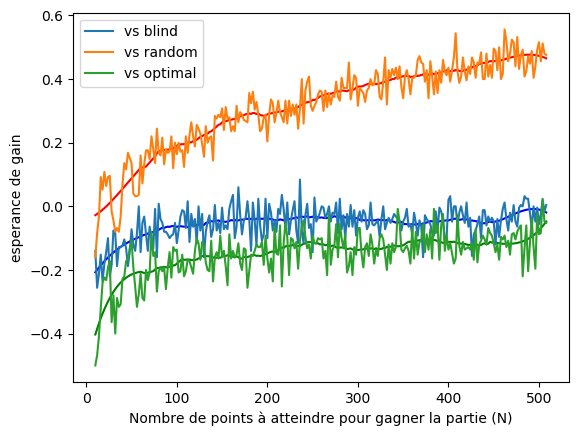

In [6]:

plt.rcdefaults()
fig, ax = plt.subplots()
z1 = savgol_filter(s1c,51,3)
z2 = savgol_filter(s2c,51,3)
z3 = savgol_filter(s3c,51,3)
ax.plot(N1b, z1, 'b')
ax.plot(N1b,z2, 'r-')
ax.plot(N1b,z3, 'g')
ax.plot(N1b, s1c, label='vs blind')
ax.plot(N1b,s2c, label='vs random')
ax.plot(N1b,s3c, label='vs optimal')
ax.set_xlabel("Nombre de points à atteindre pour gagner la partie (N)")
ax.set_ylabel('esperance de gain')
"""ax.set_title("Esperance de gain du joueur optimal lorsqu'il joue en deuxième et avec D=10")"""
plt.legend()
fig.savefig('blindVSall_scnd_N.png')

In [29]:
D = np.arange(1,101)
N = 100
D1a, d1b = dice_seq.expected_rewards_D(dice_seq.optimal_strategy,dice_seq.blind_strategy,500,N,D)
_, d2b = dice_seq.expected_rewards_D(dice_seq.optimal_strategy,dice_seq.random_strategy,500,N,D)
_, d3b = dice_seq.expected_rewards_D(dice_seq.optimal_strategy,dice_seq.optimal_strategy,500,N,D)

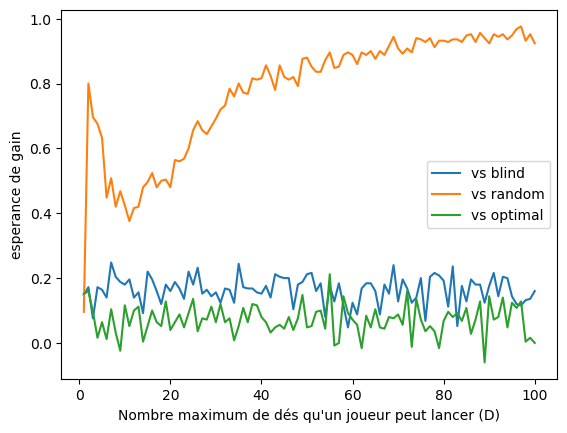

In [30]:

plt.rcdefaults()
fig, ax = plt.subplots()

ax.plot(D1a, d1b, label='vs blind')
ax.plot(D1a,d2b, label='vs random')
ax.plot(D1a,d3b, label='vs optimal')
ax.set_xlabel("Nombre maximum de dés qu'un joueur peut lancer (D)")
ax.set_ylabel('esperance de gain')
"""ax.set_title("Esperance de gain du joueur optimal lorsqu'il joue en deuxième et avec D=10")"""
plt.legend()
fig.savefig('optVSall_first_D.png')

In [31]:
D = np.arange(1,101)
N = 100
D1a, d1a = dice_seq.expected_rewards_D(dice_seq.blind_strategy,dice_seq.optimal_strategy,500,N,D,reverse=True)
_, d2a = dice_seq.expected_rewards_D(dice_seq.random_strategy,dice_seq.optimal_strategy,500,N,D,reverse=True)
_, d3a = dice_seq.expected_rewards_D(dice_seq.optimal_strategy,dice_seq.optimal_strategy,500,N,D,reverse=True)

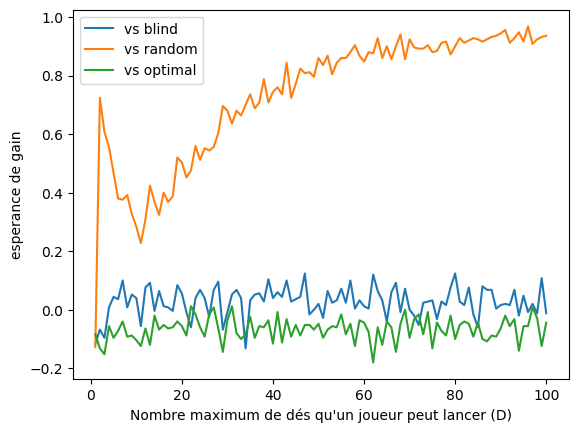

In [32]:

plt.rcdefaults()
fig, ax = plt.subplots()
ax.plot(D1a, d1a, label='vs blind')
ax.plot(D1a,d2a, label='vs random')
ax.plot(D1a,d3a, label='vs optimal')
ax.set_xlabel("Nombre maximum de dés qu'un joueur peut lancer (D)")
ax.set_ylabel('esperance de gain')
"""ax.set_title("Esperance de gain du joueur optimal lorsqu'il joue en deuxième et avec D=10")"""
plt.legend()
fig.savefig('optVSall_scnd_D.png')

In [9]:
D = np.arange(1,101)
N = 100
D1a, c1b = dice_seq.expected_rewards_D(dice_seq.blind_strategy,dice_seq.blind_strategy,500,N,D)
_, c2b = dice_seq.expected_rewards_D(dice_seq.blind_strategy,dice_seq.random_strategy,500,N,D)
_, c3b = dice_seq.expected_rewards_D(dice_seq.blind_strategy,dice_seq.optimal_strategy,500,N,D)

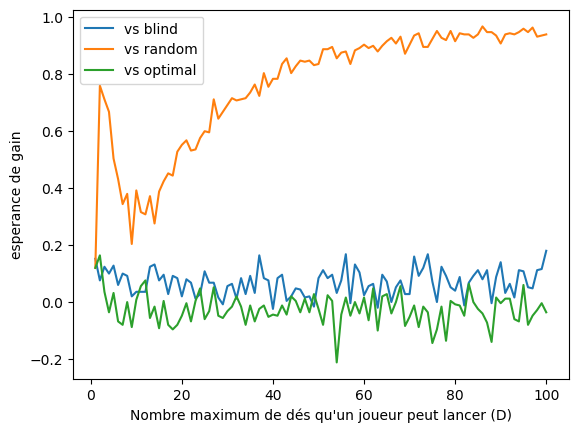

In [22]:

plt.rcdefaults()
fig, ax = plt.subplots()

ax.plot(D1a, c1b, label='vs blind')
ax.plot(D1a,c2b, label='vs random')
ax.plot(D1a,c3b, label='vs optimal')
ax.set_xlabel("Nombre maximum de dés qu'un joueur peut lancer (D)")
ax.set_ylabel('esperance de gain')
"""ax.set_title("Esperance de gain du joueur optimal lorsqu'il joue en deuxième et avec D=10")"""
plt.legend()
fig.savefig('blindVSall_first_D.png')

In [24]:
D = np.arange(1,101)
N = 100
D1a, c1a = dice_seq.expected_rewards_D(dice_seq.blind_strategy,dice_seq.blind_strategy,500,N,D,reverse=True)
_, c2a = dice_seq.expected_rewards_D(dice_seq.random_strategy,dice_seq.blind_strategy,500,N,D,reverse=True)
_, c3a = dice_seq.expected_rewards_D(dice_seq.optimal_strategy,dice_seq.blind_strategy,500,N,D,reverse=True)

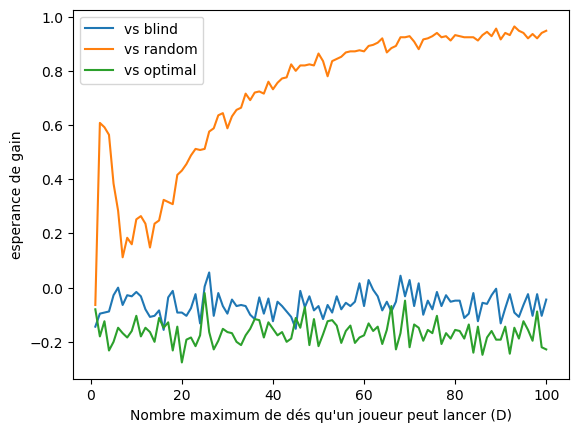

In [25]:

plt.rcdefaults()
fig, ax = plt.subplots()
ax.plot(D1a, c1a, label='vs blind')
ax.plot(D1a,c2a, label='vs random')
ax.plot(D1a,c3a, label='vs optimal')
ax.set_xlabel("Nombre maximum de dés qu'un joueur peut lancer (D)")
ax.set_ylabel('esperance de gain')
"""ax.set_title("Esperance de gain du joueur optimal lorsqu'il joue en deuxième et avec D=10")"""
plt.legend()
fig.savefig('blindVSall_scnd_D.png')

In [7]:
G = dice_sim.matrice_gain(13)
dice_sim.get_probas(G)

nan

In [2]:
N = np.arange(0,500,2)+10

P_5 = dice_seq.probabilities(5)
P_10 = dice_seq.probabilities(10)
P_20 = dice_seq.probabilities(20)
N_, a = dice_seq.expected_rewards(dice_seq.optimal_strategy,dice_seq.blind_strategy,500,N,5,P_5)
_, b = dice_seq.expected_rewards(dice_seq.optimal_strategy,dice_seq.blind_strategy,500,N,10,P_10)
_, c = dice_seq.expected_rewards(dice_seq.optimal_strategy,dice_seq.blind_strategy,500,N,20,P_20)

In [12]:
plt.rcdefaults()
fig, ax = plt.subplots()
z1 = savgol_filter(a,51,3)
z2 = savgol_filter(b,51,3)
z3 = savgol_filter(c,51,3)
ax.plot(N_, z1, 'b',label='D=5')
ax.plot(N_,z2, 'r-',label='D=10')
ax.plot(N_,z3, 'g',label='D=20')
"""ax.plot(N_, a, label='D=5')
ax.plot(N_,b, label='D=10')
ax.plot(N_,c, label='D=20')"""
ax.set_xlabel("Nombre de points à atteindre pour gagner la partie (N)")
ax.set_ylabel('esperance de gain')
"""ax.set_title("Esperance de gain du joueur optimal lorsqu'il joue en deuxième et avec D=10")"""
plt.legend()
fig.savefig('optVSblind.png')


In [29]:
list_D=np.arange(1,150,1)
#_,OvsR=expected_rewards_simult(dice.blind_strategy,dice.random_strategy,50,list_D)
_,RvsB=dice_sim.expected_rewards_simult(dice_seq.random_strategy,dice_seq.blind_strategy,100,list_D)
_,BvsR=dice_sim.expected_rewards_simult(dice_seq.blind_strategy,dice_seq.random_strategy,100,list_D)

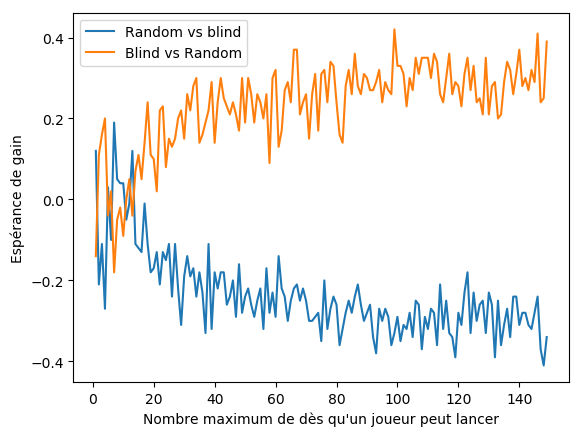

In [30]:
plt.rcdefaults()
fig, ax = plt.subplots()
#ax.plot(list_D, OvsR,'r', label='vs random')
ax.plot(list_D,RvsB, label='Random vs blind')
ax.plot(list_D,BvsR, label='Blind vs Random')
ax.set_xlabel("Nombre maximum de dès qu'un joueur peut lancer")
ax.set_ylabel('Espérance de gain')
plt.legend()

In [51]:
list_D=np.arange(1,50,2)
_,BvsR=dice_sim.expected_rewards_simult(dice_seq.blind_strategy,dice_seq.random_strategy,50,list_D)
_,BvsB=dice_sim.expected_rewards_simult(dice_seq.blind_strategy,dice_seq.blind_strategy,50,list_D)
_,BvsO=dice_sim.expected_rewards_simult(dice_seq.blind_strategy,dice_sim.strategy_sim,50,list_D)

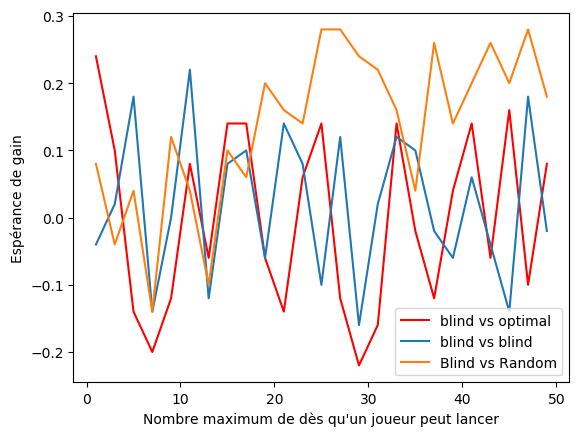

In [52]:
plt.rcdefaults()
fig, ax = plt.subplots()
ax.plot(list_D, BvsO,'r', label='blind vs optimal')
ax.plot(list_D,BvsB, label='blind vs blind')
ax.plot(list_D,BvsR, label='Blind vs Random')
ax.set_xlabel("Nombre maximum de dès qu'un joueur peut lancer")
ax.set_ylabel('Espérance de gain')
plt.legend()

In [21]:
G = dice_sim.matrice_gain(4)
dice_sim.get_probas(G)

array([0., 0., 0., 1.])

In [20]:
dice_seq.blind_strategy(4)

4

In [20]:
G

array([[ 0.        , -0.375     , -0.22685185, -0.05079733,  0.09655778],
       [ 0.375     , -0.        , -0.19881687, -0.11640518,  0.0136424 ],
       [ 0.22685185,  0.19881687,  0.        , -0.10027292, -0.04524844],
       [ 0.05079733,  0.11640518,  0.10027292, -0.        , -0.04477462],
       [-0.09655778, -0.0136424 ,  0.04524844,  0.04477462, -0.        ]])

In [21]:
from gurobipy import *

In [37]:
N = np.arange(20,500,2)
D = 6
P = dice_seq.probabilities(D)
N1b, r1c = dice_seq.expected_rewards(dice_seq.blind_strategy,dice_seq.optimal_strategy,500,N,D,P)

In [62]:
def play2(strategy1, strategy2, d_opt = None, N = 100, D = 10):
    state = [0,0]
    players = [strategy1, strategy2]
    curr_player = 0
    while(state[0] < N and state[1] < N):
        if players[curr_player] == dice_seq.optimal_strategy :
            d = players[curr_player](d_opt,state[curr_player],state[(curr_player+1)%2])
        else:
            d = players[curr_player](D)
        state[curr_player] += dice_seq.player_roll(d,draw=False)
        curr_player = (curr_player+1) % 2
    return [1, -1] if state[0]> state[1] else [-1, 1]

In [76]:
P = dice_seq.probabilities(10)
d_opt = dice_seq.optimal_strategy_iter(10,P,100)[1]
play2(dice_seq.optimal_strategy,dice_seq.random_strategy,d_opt=d_opt)

[1, -1]